In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import datasets
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc

In [2]:
df = pd.read_csv('../data/balanced_sclaer_dataset_diabetes.csv')

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.isnull().sum().sum()

0

In [5]:
y = df["Diabetes_012"]
X = df.drop(["Diabetes_012"], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [7]:
X["GenHlth"].value_counts()

0.500000    30529
0.250000    23422
0.750000    17053
0.000000     7735
1.000000     6990
            ...  
0.008861        1
0.108413        1
0.581668        1
0.308248        1
0.513882        1
Name: GenHlth, Length: 19567, dtype: int64

In [8]:
# классификация

# clf = DecisionTreeClassifier(max_depth=2)
# clf.fit(X, y)

In [9]:
optimal_tree = GridSearchCV(DecisionTreeClassifier(), 
                                                       {
                                                        'criterion': ["gini", "entropy", "log_loss"],
                                                        'max_depth': np.array(range(1, 2*X_train.shape[1]+1)),
                                                        # 'min_samples_split': np.array(range(2, X_train.shape[0]//2))
                                                        },
                                                        cv=2,
                                                        n_jobs=3,
                                                        scoring='accuracy'
                                            ).fit(X_train, y_train)

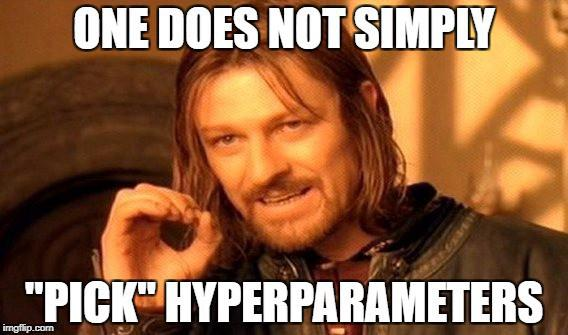

In [10]:
optimal_tree.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [13]:
decision_tree_classifier = DecisionTreeClassifier(
    criterion = optimal_tree.best_params_['criterion'] if 'criterion' in optimal_tree.best_params_ else 'gini',
    max_depth = optimal_tree.best_params_['max_depth'] if 'max_depth' in optimal_tree.best_params_ else None,
    )
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14)

In [15]:
text_representation = tree.export_text(decision_tree_classifier)
print(text_representation)

|--- feature_0 <= 0.00
|   |--- feature_13 <= 0.25
|   |   |--- feature_18 <= 0.50
|   |   |   |--- feature_1 <= 0.01
|   |   |   |   |--- feature_3 <= 0.18
|   |   |   |   |   |--- feature_13 <= 0.02
|   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |--- feature_18 <= 0.46
|   |   |   |   |   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_14 <= 0.97
|   |   |   |   |   |   |   |   |   |   |--- feature_19 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_19 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- feature_14 >  0.97
|   |   |   |   |   |   |   |   |   |   |--- feature_9 <= 0.17
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_9 >  0.17
|   |   |   |   |   |   |   |   |   |  

In [16]:
target_names = list(map(str, y.unique()))
features = list(df.columns)[:-1]

In [18]:
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(decision_tree_classifier, feature_names=features, class_names=target_names, filled=True)

In [19]:
pred_train = decision_tree_classifier.predict(X_test)
pred_train

array([0., 2., 1., ..., 1., 0., 1.])

In [21]:
print(accuracy_score(y_test, pred_train))

0.7745106419352081


In [23]:
print(confusion_matrix(y_test, pred_train))

[[ 7746   291  3746]
 [  291 10650   740]
 [ 2665   181  8787]]


In [22]:
print('Precision, Recall, F\n', classification_report(y_test, pred_train))

Precision, Recall, F
               precision    recall  f1-score   support

         0.0       0.72      0.66      0.69     11783
         1.0       0.96      0.91      0.93     11681
         2.0       0.66      0.76      0.71     11633

    accuracy                           0.77     35097
   macro avg       0.78      0.77      0.78     35097
weighted avg       0.78      0.77      0.78     35097

